### Python For Economics Assignment 01

20180594 이정훈

#### 사용된 기본 Packages와 음원 Data

numpy, matplotlib, Audio, requests 등의 모듈이 사용되었으며, 음원은 laugh와 woosh로 총 두개가 사용되었다.

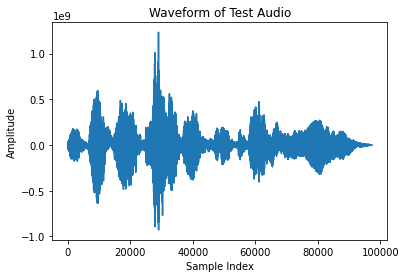

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy. fft import fft, ifft
%matplotlib inline

import requests

url = "https://raw.githubusercontent.com/k5yi/econ2005/master/datasets/kid_laugh.wav"
laugh = requests.get(url).content

with open('kid_laugh.wav', 'wb') as f:
    f.write(laugh)

fs, data = read('kid_laugh.wav')

data = data[:,0]
Audio(data, rate=fs)

plt.figure()
plt.plot(data)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Waveform of Test Audio')
plt.show()

예제 : sample rate

In [7]:
fs, data = read('kid_laugh.wav')

def down_sampling(sample, fs, by):
    step = int(1/by)
    return int(fs*by), data[::step, :]

rate, downsample = down_sampling(data, fs, 0.1)
Audio(downsample.T, rate=rate)

### 2.1 Reversing Sound

In [8]:
def reverse_play(sample, fs = 44100):
    return int(fs), np.flip(sample, axis=0) 

fs, rev_sound = reverse_play(data)
Audio(rev_sound.T, rate=fs)

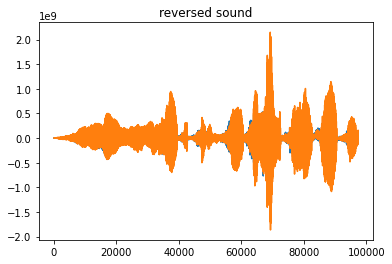

In [17]:
plt.figure()
plt.plot(rev_sound)
plt.title('reversed sound')
plt.show()

### 2.2 Volume Scale

In [9]:
def amplify(sample_level, fs = 44100):
    return int(fs), data*10**(sample_level/20)

fs, amplified = amplify(sample_level = 6)
Audio(amplified.T, rate=fs)

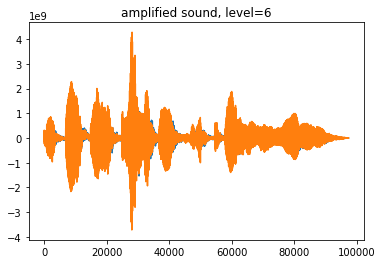

In [20]:
plt.figure()
plt.plot(amplified)
plt.title('amplified sound, level=6')
plt.show()

### 2.3 Echo

In [10]:
def echo_effect(sample, fs, delay, repeat, effect):
    data = sample
    for i in range(repeat):
        sample = np.r_[data,np.zeros((int(fs*delay)*(i+1),2))] + np.r_[np.zeros((int(fs*delay),2)),sample*(1-effect)]
    return sample

echo = echo_effect(data, fs=44100, delay=1, repeat=2, effect=.2)
Audio(echo.T, rate=fs)

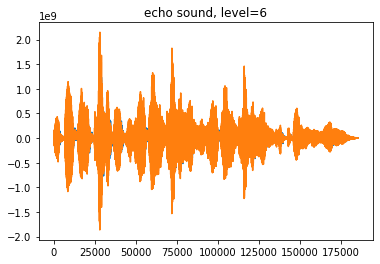

In [21]:
plt.figure()
plt.plot(echo)
plt.title('echo sound, level=6')
plt.show()

### 2.4 Mixing Sounds

In [15]:
url = "https://raw.githubusercontent.com/k5yi/econ2005/master/datasets/kid_laugh.wav"
laugh = requests.get(url).content

with open('kid_laugh.wav', 'wb') as f:
    f.write(laugh)

fs, data = read('kid_laugh.wav')

data = data[:,0]

url = "https://raw.githubusercontent.com/k5yi/econ2005/master/datasets/woosh.wav"
woosh = requests.get(url).content

with open('woosh.wav', 'wb') as f:
    f.write(woosh)
    
fs, woosh = read('woosh.wav')

woosh = woosh[:,0]

In [16]:
def mixing(data, weight):  
    if data[0].size < data[1].size :
        mix = (weight[0]*np.resize(data[0], data[1].shape))+(data[1]*weight[1])    
    else :
        mix = (weight[1]*np.resize(data[1], data[0].shape))+(data[0]*weight[0])
    return fs, mix

fs, mix = mixing([data, woosh], weight=(.4,.6))
Audio(mix.T, rate=fs)

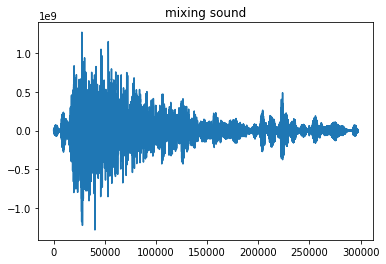

In [22]:
plt.figure()
plt.plot(mix)
plt.title('mixing sound')
plt.show()